In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
X=df.iloc[:,1:22]
y=df.iloc[:,0]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (253680, 21) 
y -  (253680,)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Accuracy: 0.9080978007579887
Test Accuracy: 0.9084673604541155
Best Hyperparameters: {'hidden_layer_sizes': (100,), 'alpha': 0.01, 'activation': 'logistic'}
Execution Time: 808.6605882644653 seconds


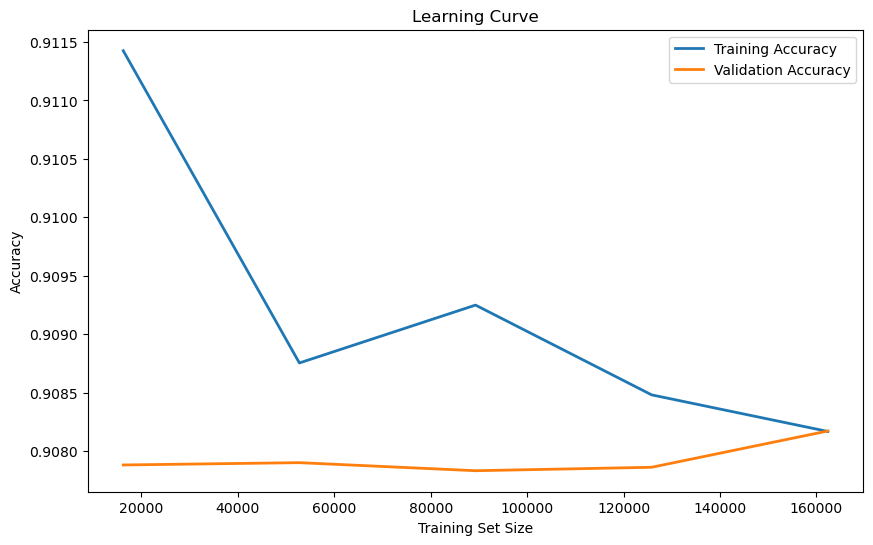

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import time

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50, 25)],  # Number of neurons in each hidden layer
    'activation': ['logistic'],  # Sigmoid activation function
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization parameter
}

# Create an MLP classifier with the sigmoid activation function
mlp = MLPClassifier(activation='logistic', max_iter=1000, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_mlp = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best MLP model on the test set
y_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_params)
print("Execution Time:", execution_time, "seconds")

# Plot learning curve
train_sizes, train_scores, val_scores = learning_curve(best_mlp, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy', linewidth=2)
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy', linewidth=2)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Accuracy: 0.9075754922436191
Test Accuracy: 0.9083293913591927
Best Hyperparameters: {'C': 1}
Execution Time: 69.43496108055115 seconds


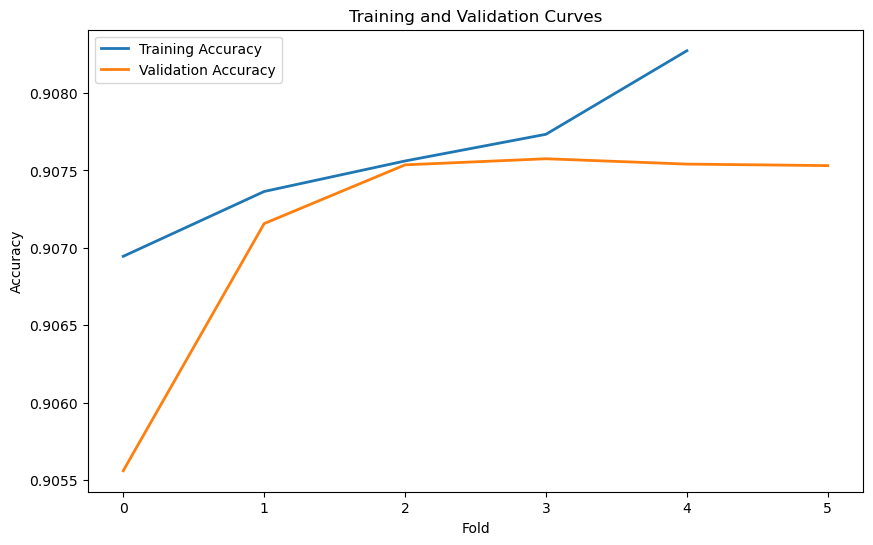

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# Create a Logistic Regression classifier
logistic_reg = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(logistic_reg, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Perform the random search
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time = end_time - start_time

# Get the best estimator and its parameters
best_logistic_reg = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best Logistic Regression model on the test set
y_pred = best_logistic_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Best Accuracy:", random_search.best_score_)
print("Test Accuracy:", test_accuracy)
print("Best Hyperparameters:", best_params)
print("Execution Time:", execution_time, "seconds")

# Plot training and validation curves using cross-validation
plt.figure(figsize=(10, 6))

# Note: Cross-validation is used here instead of loss_curve_ for Logistic Regression
# You can change the number of folds (cv parameter) based on your preference
train_scores = cross_val_score(best_logistic_reg, X_train, y_train, cv=5, scoring='accuracy')
plt.plot(train_scores, label='Training Accuracy', linewidth=2)

# Validation scores during the RandomizedSearchCV
validation_scores = random_search.cv_results_['mean_test_score']
plt.plot(validation_scores, label='Validation Accuracy', linewidth=2)

plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Training and Validation Curves')
plt.legend()
plt.show()
